# **APTOS2019 Data Exploration** 
###### _Dataset obtained from: https://www.kaggle.com/datasets/mariaherrerot/aptos2019/data?select=valid.csv_

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
from PIL.ExifTags import TAGS
import os

#### 1. Exploration of CSV Files:

In [26]:
# Viewing the first 5 rows of the 'train' csv file

train_csv_file_path = 'C:/Users/Kaylin/OneDrive/Documents/Fourth Year IE 2024/Investigation Project/ELEN4012A-Investigation-Project/Data/APTOS-2019 Dataset/train.csv'
test_csv_file_path = 'C:/Users/Kaylin/OneDrive/Documents/Fourth Year IE 2024/Investigation Project/ELEN4012A-Investigation-Project/Data/APTOS-2019 Dataset/test.csv'
val_csv_file_path = 'C:/Users/Kaylin/OneDrive/Documents/Fourth Year IE 2024/Investigation Project/ELEN4012A-Investigation-Project/Data/APTOS-2019 Dataset/val.csv'

train_df = pd.read_csv(train_csv_file_path)
test_df = pd.read_csv(test_csv_file_path)
val_df = pd.read_csv(val_csv_file_path)

train_df.head()

,id_code,diagnosis
0,1ae8c165fd53,2
1,1b329a127307,1
2,1b32e1d775ea,4
3,1b3647865779,0
4,1b398c0494d1,0


In [23]:
# The distrobution of the training data is given below

train_df.describe()

,diagnosis
count,2930.000000
mean,1.131058
std,1.295220
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,4.000000


In [55]:
# Determining if there are any null values
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_code    2930 non-null   object
 1   diagnosis  2930 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 45.9+ KB


_No null values found_

In [41]:
# Displaying the count for the different diagoses in the train, test and validate datasets

for row in ['diagnosis']:
    train_counts = train_df[row].value_counts()
    test_counts = test_df[row].value_counts()
    val_counts = val_df[row].value_counts()
    
    # Combines the counts into a single DataFrame
    counts_df = pd.DataFrame({
        'Train': train_counts,
        'Test': test_counts,
        'Val': val_counts
    }).fillna(0).astype(int)  # Fill NaN with 0 and ensure the counts are integers

    print(f"Value counts for {row}:") # Displays the combined DataFrame
    print(counts_df)
    print("\n" + "="*28 + "\n")

    

Value counts for diagnosis:
           Train  Test  Val
diagnosis                  
0           1434   199  172
1            300    30   40
2            808    87  104
3            154    17   22
4            234    33   28




_Now, looking at the CSV files in a multiclass state:_

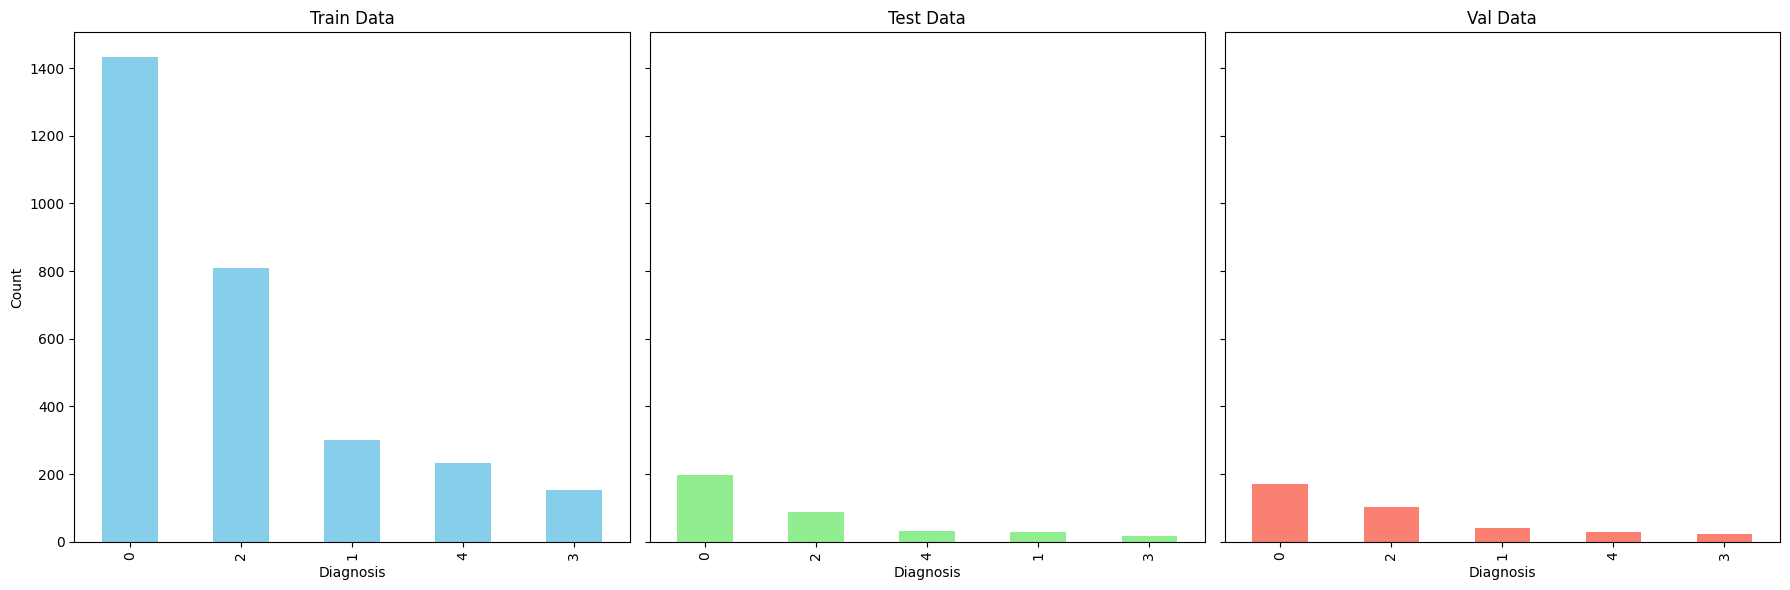

In [53]:
# Creating Histograms to View the Diagnostic Counts

fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot histograms for each DataFrame
train_df['diagnosis'].value_counts().plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Train Data')
axs[0].set_xlabel('Diagnosis')
axs[0].set_ylabel('Count')

test_df['diagnosis'].value_counts().plot(kind='bar', ax=axs[1], color='lightgreen')
axs[1].set_title('Test Data')
axs[1].set_xlabel('Diagnosis')

val_df['diagnosis'].value_counts().plot(kind='bar', ax=axs[2], color='salmon')
axs[2].set_title('Val Data')
axs[2].set_xlabel('Diagnosis')

plt.tight_layout() # Adjusts layout for better spacing

plt.show()


_The counts between the different diagnosises are not equal, especially in the training set. This could become problematic in the fairness and generalisation of the model._

_Next, looking at the CSV files in a binary state:_

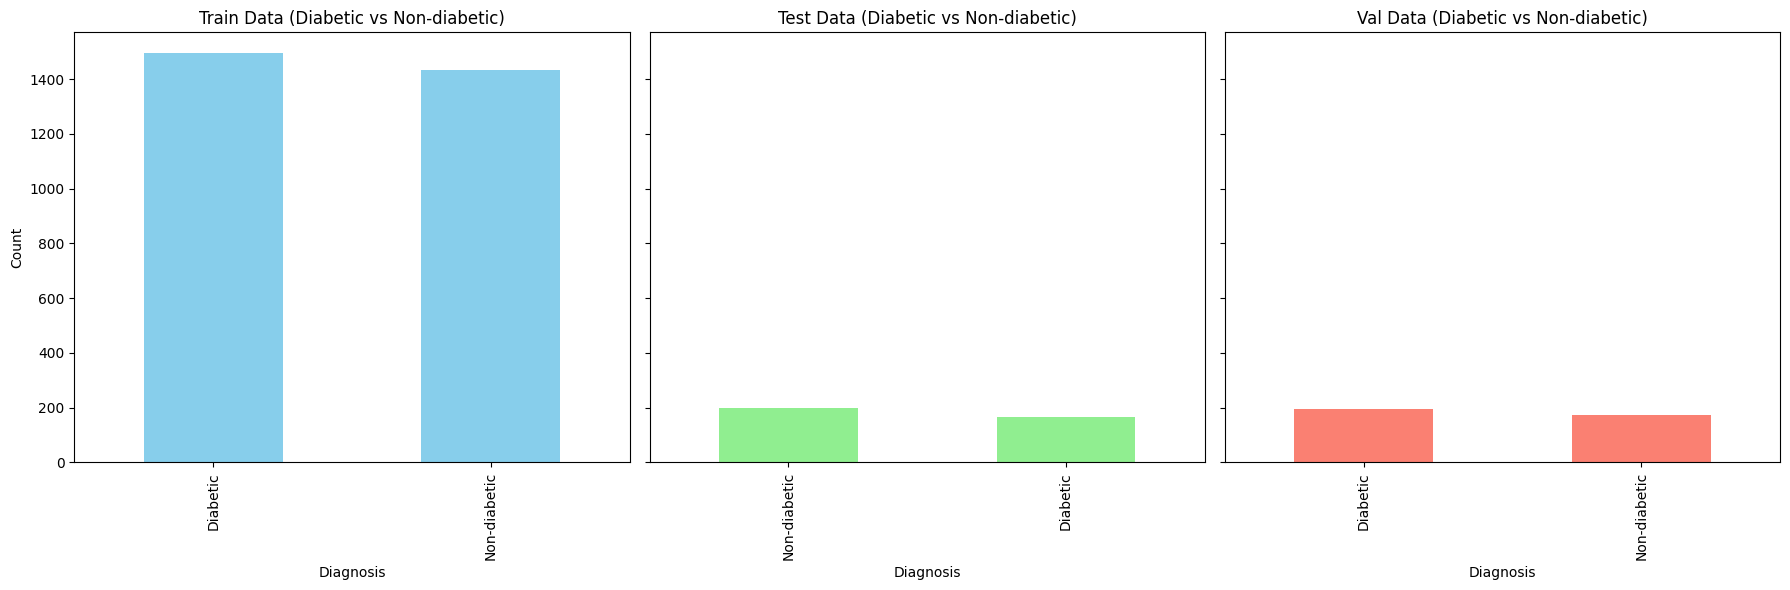

In [54]:
# Creating Histograms to View the Diagnostic Counts for the Binary Case of Diabetic vs Non-diabetic

# Combines diagnosis 1-4 into a single, diabetic category
def combine_diagnoses(df):
    df['diagnosis'] = df['diagnosis'].replace([1, 2, 3, 4], 'Diabetic')
    df['diagnosis'] = df['diagnosis'].replace([0], 'Non-diabetic')
    return df

# Applies the function to each dataset
train_df_combined = combine_diagnoses(train_df.copy())
test_df_combined = combine_diagnoses(test_df.copy())
val_df_combined = combine_diagnoses(val_df.copy())

fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot histograms for each DataFrame for the binary case
train_df_combined['diagnosis'].value_counts().plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Train Data (Diabetic vs Non-diabetic)')
axs[0].set_xlabel('Diagnosis')
axs[0].set_ylabel('Count')

test_df_combined['diagnosis'].value_counts().plot(kind='bar', ax=axs[1], color='lightgreen')
axs[1].set_title('Test Data (Diabetic vs Non-diabetic)')
axs[1].set_xlabel('Diagnosis')

val_df_combined['diagnosis'].value_counts().plot(kind='bar', ax=axs[2], color='salmon')
axs[2].set_title('Val Data (Diabetic vs Non-diabetic)')
axs[2].set_xlabel('Diagnosis')

plt.tight_layout()

plt.show()

_The counts for diabetic vs non-diabetic are similar in all sections of this dataset. This means from a binary standpoint, the data is balanced. This is prefered as it will minimise bias in the model, improve the model generalisation and the model fairness._

#### 2. Exploration of Images:

In [6]:
# Looking to see if there is anything within the metadata of the images

image_path_1 = 'C:/Users/Kaylin/OneDrive/Documents/Fourth Year IE 2024/Investigation Project/ELEN4012A-Investigation-Project/Data/APTOS-2019 Dataset/train_images/1ae8c165fd53.png'

def get_image_metadata(image_path):

    image = Image.open(image_path)
    
    exif_meta_data = image._getexif() # Extracts the metadata
    
    if exif_meta_data is not None:
        # Converts the EXIF data to a more readable format
        metadata = {}
        for tag, value in exif_meta_data.items():
            tag_name = TAGS.get(tag, tag)
            metadata[tag_name] = value
        return metadata
    else:
        return "No EXIF metadata found."

metadata_1 = get_image_metadata(image_path_1) # Gets the metadata

print("Metadata for Image:") # Displays the metadata
if isinstance(metadata_1, dict):
    for key, value in metadata_1.items():
        print(f"{key}: {value}")
else:
    print(metadata_1)



Metadata for Image:
No EXIF metadata found.


In [ ]:
# Displaying the Dimensions and Aspect Ratio for the first 5 images in the Training Folder 

In [ ]:
# Displaying the pixel intesisty distrobution for the first 5 images in the Training Folder 

# (Plot histograms of pixel intesities. Look for patterns like whether the images are mostly dark, mostly bright, or have a full range of intensities)

In [ ]:
# Display the Signal to Noise Ratio and sharpness of the first five images in the training folder. Also determine the average SNR and sharpness of the data.

# Maybe look at the SNR for different diagnoses (i.e., see if the averge noise for the different classes, 0-4, is wildly different - plot in histogram)

# maybe also look at image texture (either of the first 5 images or average texture for the different classes)